In [2]:
import csv
import matplotlib.pyplot as plt
from statistics import variance
from math import sqrt
import os


In [3]:
RR_DATA_FILE = 'sim_data_rr.csv'
FIFO_DATA_FILE = 'sim_data_fifo.csv'
GRAPHS_DIR = 'graphs'

NUM_RUNS = 10

numUsersRR = []
responseTimesRR = []
goodPutsRR = []
badPutsRR = []
requestDropRatesRR = []
coreUtilisationsRR = []
avgQueueLengthRR = []
avgWaitingTimeInQueueRR = []

numUsersFIFO = []
responseTimesFIFO = []
goodPutsFIFO = []
badPutsFIFO = []
requestDropRatesFIFO = []
coreUtilisationsFIFO = []
avgQueueLengthFIFO = []
avgWaitingTimeInQueueFIFO = []


In [4]:
def load_data(filename: str, numUsers: list, responseTimes: list, goodPuts: list, badPuts: list, requestDropRates: list, coreUtilisations: list, avgQueueLength: list, avgWaitingTimeInQueue: list):
    with open(filename) as f:
        reader = csv.reader(f)

        next(reader)
        next(reader)
        next(reader)

        for line in reader:
            numUsers.append(int(line[0]))
            responseTimes.append(list(map(float,line[1:NUM_RUNS+1])))
            goodPuts.append(list(map(float,line[(NUM_RUNS + 1):(2 * NUM_RUNS) + 1])))
            badPuts.append(list(map(float,line[(2 * NUM_RUNS + 1):(3 * NUM_RUNS) + 1])))
            requestDropRates.append(list(map(float,line[(3 * NUM_RUNS + 1):(4 * NUM_RUNS) + 1])))
            coreUtilisations.append(list(map(float,line[(4 * NUM_RUNS + 1):(5 * NUM_RUNS) + 1])))
            avgQueueLength.append(list(map(float,line[(5 * NUM_RUNS + 1):(6 * NUM_RUNS) + 1])))
            avgWaitingTimeInQueue.append(list(map(float,line[(6 * NUM_RUNS + 1):(7 * NUM_RUNS) + 1])))

def avg(l: list) -> float:
    return sum(l) / len(l)


In [5]:
# create directory for graphs
if not os.path.exists(GRAPHS_DIR):
    os.makedirs(GRAPHS_DIR)

In [6]:
load_data(RR_DATA_FILE, numUsersRR, responseTimesRR, goodPutsRR, badPutsRR, requestDropRatesRR, coreUtilisationsRR, avgQueueLengthRR, avgWaitingTimeInQueueRR)
load_data(FIFO_DATA_FILE, numUsersFIFO, responseTimesFIFO, goodPutsFIFO, badPutsFIFO, requestDropRatesFIFO, coreUtilisationsFIFO, avgQueueLengthFIFO, avgWaitingTimeInQueueFIFO)


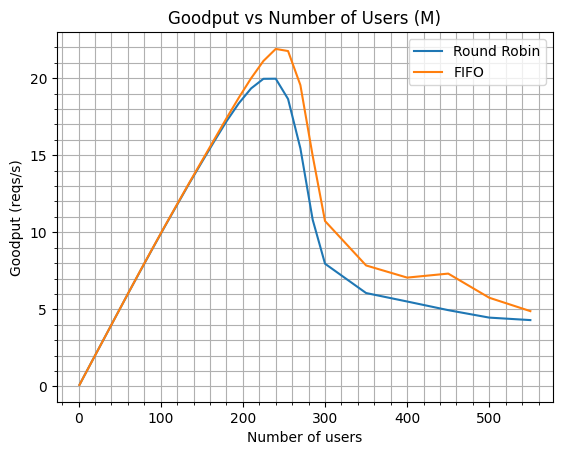

In [7]:

plt.plot(numUsersRR, list(map(avg, goodPutsRR)), label='Round Robin')
plt.plot(numUsersFIFO, list(map(avg, goodPutsFIFO)), label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('Goodput (reqs/s)')
plt.title('Goodput vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/goodput.png')
plt.show()

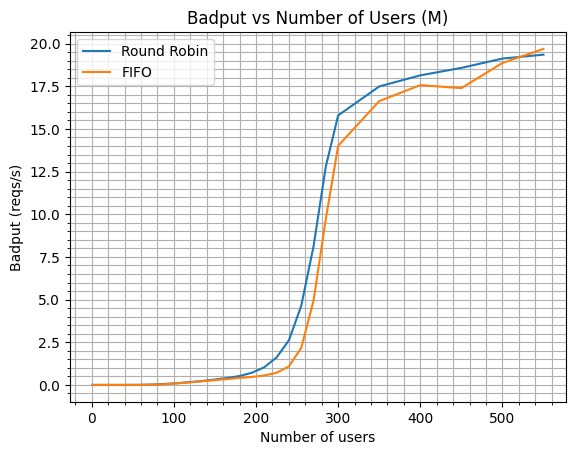

In [8]:
plt.plot(numUsersRR, list(map(avg, badPutsRR)), label='Round Robin')
plt.plot(numUsersFIFO, list(map(avg, badPutsFIFO)), label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('Badput (reqs/s)')
plt.title('Badput vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/badput.png')
plt.show()

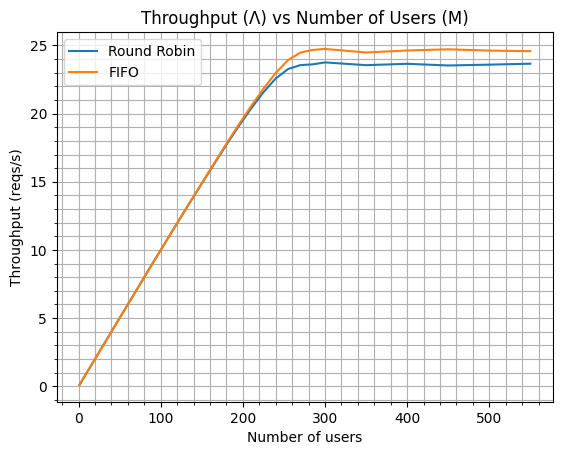

In [9]:
plt.plot(numUsersRR, [ sum(x)  for x in zip( map(avg, goodPutsRR) , map(avg, badPutsRR)) ], label='Round Robin')
plt.plot(numUsersFIFO, [ sum(x)  for x in zip( map(avg, goodPutsFIFO) , map(avg, badPutsFIFO)) ], label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('Throughput (reqs/s)')
plt.title('Throughput (Λ) vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/throughput.png')
plt.show()

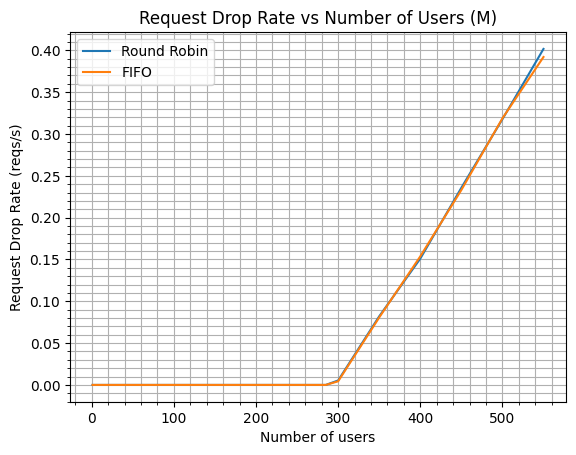

In [10]:
plt.plot(numUsersRR, list(map(avg, requestDropRatesRR)), label='Round Robin')
plt.plot(numUsersFIFO, list(map(avg, requestDropRatesFIFO)), label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('Request Drop Rate (reqs/s)')
plt.title('Request Drop Rate vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/req_drop_rate.png')
plt.show()

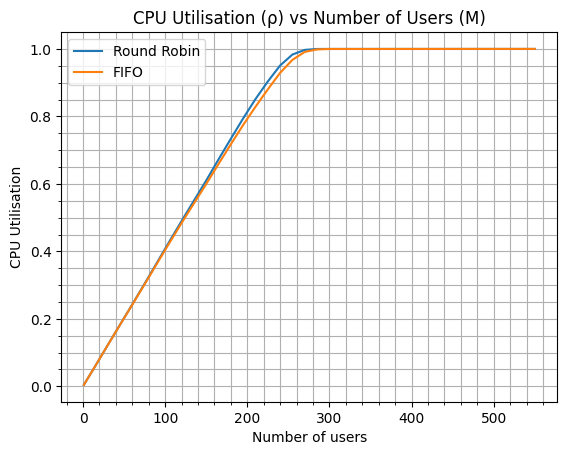

In [11]:
plt.plot(numUsersRR, list(map(avg, coreUtilisationsRR)), label='Round Robin')
plt.plot(numUsersFIFO, list(map(avg, coreUtilisationsFIFO)), label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('CPU Utilisation')
plt.title('CPU Utilisation (ρ) vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/utilisation.png')
plt.show()

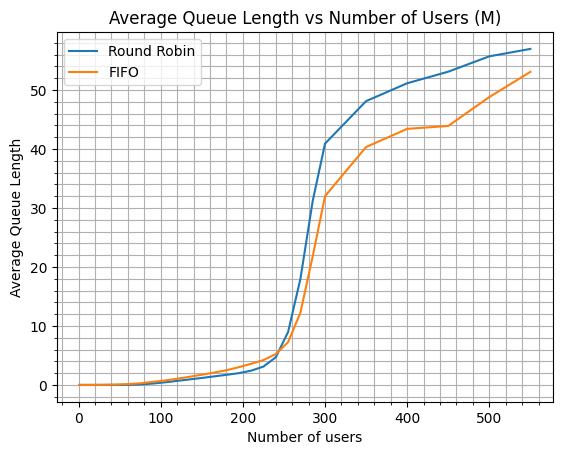

In [12]:
plt.plot(numUsersRR, list(map(avg, avgQueueLengthRR)), label='Round Robin')
plt.plot(numUsersFIFO, list(map(avg, avgQueueLengthFIFO)), label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('Average Queue Length')
plt.title('Average Queue Length vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/avg_queue_len.png')
plt.show()

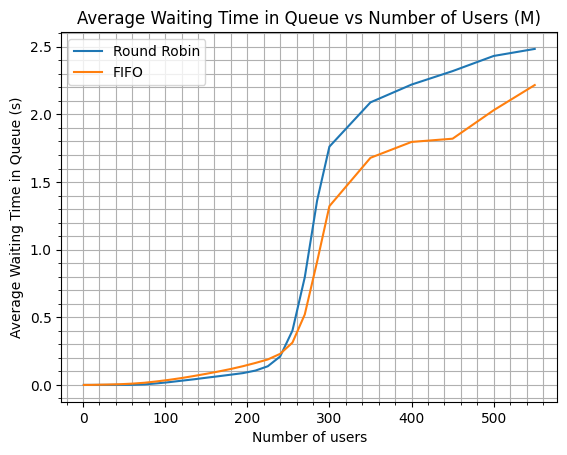

In [13]:
plt.plot(numUsersRR, list(map(avg, avgWaitingTimeInQueueRR)), label='Round Robin')
plt.plot(numUsersFIFO, list(map(avg, avgWaitingTimeInQueueFIFO)), label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('Average Waiting Time in Queue (s)')
plt.title('Average Waiting Time in Queue vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/avg_queue_wait_time.png')
plt.show()

In [14]:
def plot_confidence_interval(x: int, values: list[float], z: float, color: str) -> None:

    mean = avg(values)
    fac = sqrt(variance(values)/len(values))

    top = mean + z * fac
    bottom = mean - z * fac

    plt.plot([x, x], [ bottom, top ], color=color)

    


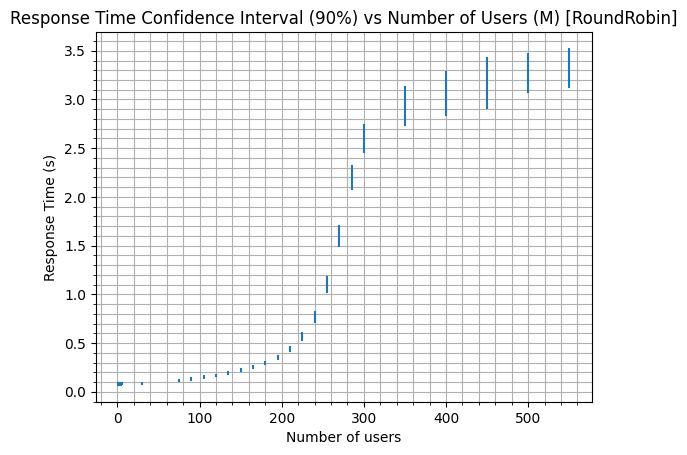

In [15]:
for i in range(len(numUsersRR)):
    plot_confidence_interval(numUsersRR[i], responseTimesRR[i], 1.96, 'tab:blue')

plt.xlabel('Number of users')
plt.ylabel('Response Time (s)')
plt.title('Response Time Confidence Interval (90%) vs Number of Users (M) [RoundRobin]')
plt.minorticks_on()
plt.grid(True, 'both')
# plt.savefig('graphs/resp_time_ci_rr.png')
plt.show()

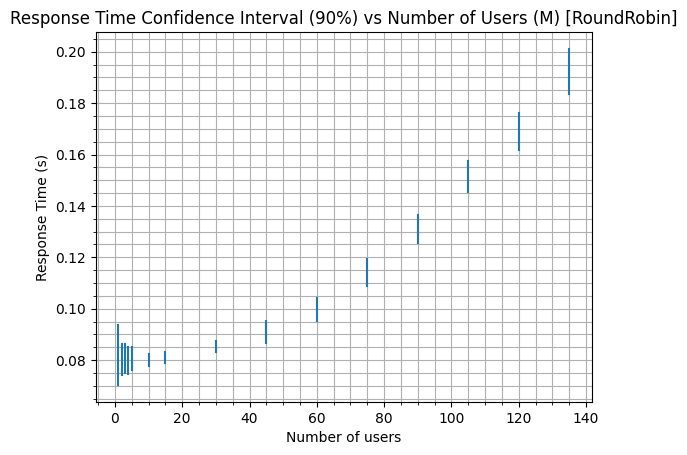

In [16]:
for i in range(min(15, len(numUsersRR))):
    plot_confidence_interval(numUsersRR[i], responseTimesRR[i], 1.96, 'tab:blue')

plt.xlabel('Number of users')
plt.ylabel('Response Time (s)')
plt.title('Response Time Confidence Interval (90%) vs Number of Users (M) [RoundRobin]')
plt.minorticks_on()
plt.grid(True, 'both')
# plt.savefig('graphs/resp_time_ci_rr_zoomed.png')
plt.show()

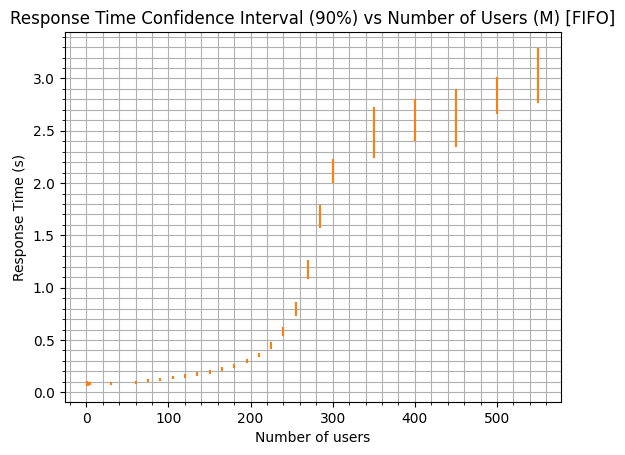

In [17]:
for i in range(len(numUsersFIFO)):
    plot_confidence_interval(numUsersFIFO[i], responseTimesFIFO[i], 1.96, 'tab:orange')

plt.xlabel('Number of users')
plt.ylabel('Response Time (s)')
plt.title('Response Time Confidence Interval (90%) vs Number of Users (M) [FIFO]')
plt.minorticks_on()
plt.grid(True, 'both')
# plt.savefig('graphs/resp_time_ci_fifo.png')
plt.show()

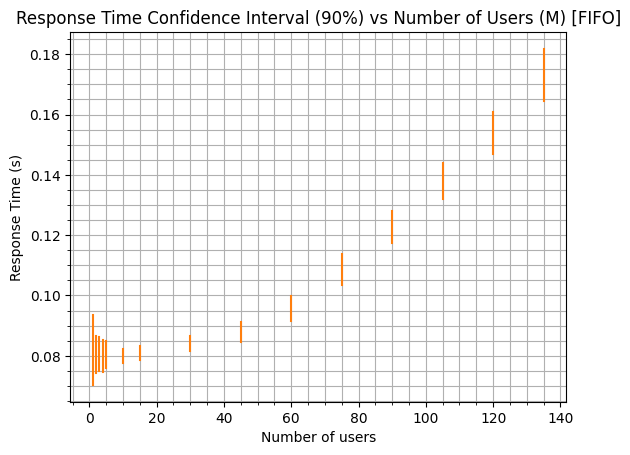

In [18]:
for i in range(min(15,len(numUsersFIFO))):
    plot_confidence_interval(numUsersFIFO[i], responseTimesFIFO[i], 1.96, 'tab:orange')

plt.xlabel('Number of users')
plt.ylabel('Response Time (s)')
plt.title('Response Time Confidence Interval (90%) vs Number of Users (M) [FIFO]')
plt.minorticks_on()
plt.grid(True, 'both')
# plt.savefig('graphs/resp_time_ci_fifo_zoomed.png')
plt.show()

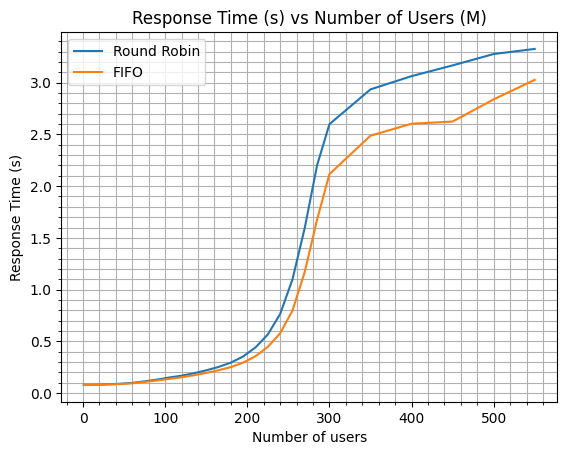

In [36]:
plt.plot(numUsersRR, list(map(avg, responseTimesRR)), label='Round Robin')
plt.plot(numUsersRR, list(map(avg, responseTimesFIFO)), label='FIFO')
plt.xlabel('Number of users')
plt.ylabel('Response Time (s)')
plt.title('Response Time (s) vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
# plt.savefig('graphs/resp_time_ci_fifo.png')
plt.show()